# Diadetes

## 1. EDA / preprocssing

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("diabetes.csv")

#### Data Describe
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [5]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 최소값이 0인 열이 있는 것으로 보아 0 인 결측치가 존재하는 것을 예상해 볼 수 있다.
- SkinThickness 열에서 최대값이 99 인 경우가 있는 것으로 보아 이상치/결측치로 에상된다.


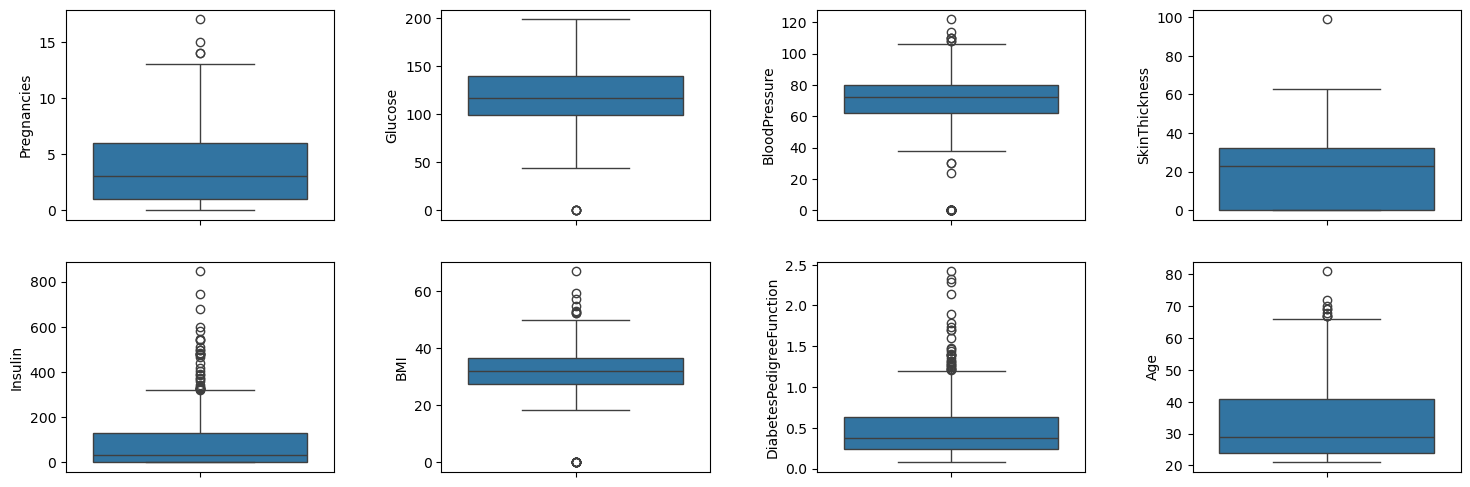

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
for i in range(8):
    sns.boxplot(y = df.columns[i], ax=axes[i//4][i%4], data = df)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [12]:
## 0 이상치 처리
(df[df.columns[:-1]] == 0).sum()

## 임신 횟수는 0회가 나올 수 있으므로 처리 x
## Age와 DiabetesPedigreeFunction에는 0에 해당하는 이상치가 존재하지 않아보임

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [13]:
(df[df.columns[1:-3]] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [14]:
## 처음에 확인했던 피부두께 99인 사람의 정보확인
df.loc[df["SkinThickness"] == 99]

## 다른 수치를 확인했을때 정상으로 판단되므로 이상치로 간주

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [15]:
df[df.columns[1:-3]] = df[df.columns[1:-3]].replace(0, np.nan)
df.loc[df["SkinThickness"] == 99, "SkinThickness"] = np.nan

In [16]:
# 평균으로 대체
df = df.fillna(df.mean())

In [17]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.024074,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.024074,155.548223,30.1,0.349,47,1


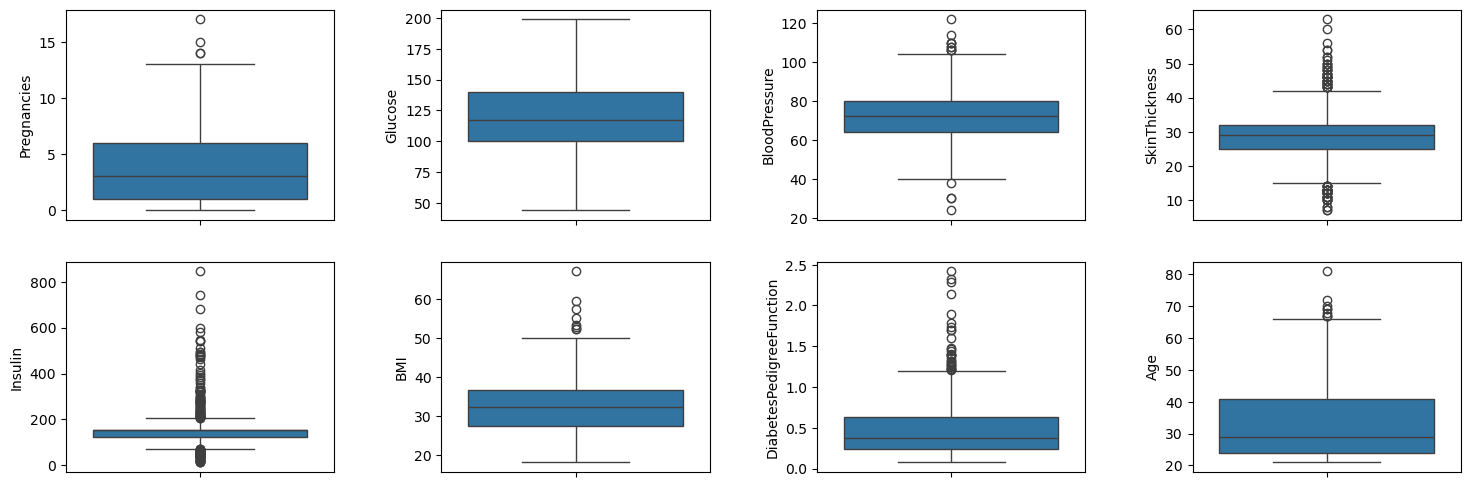

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
for i in range(8):
    sns.boxplot(y = df.columns[i], ax=axes[i//4][i%4], data = df)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [19]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.091500,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.174404,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.202606,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.091500,0.174404,0.202606,1.000000,0.165092,0.563399,0.103112,0.105449,0.209607
Insulin,0.056027,0.420157,0.072517,0.165092,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.563399,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.103112,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.105449,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.209607,0.214411,0.311924,0.173844,0.238356,1.000000


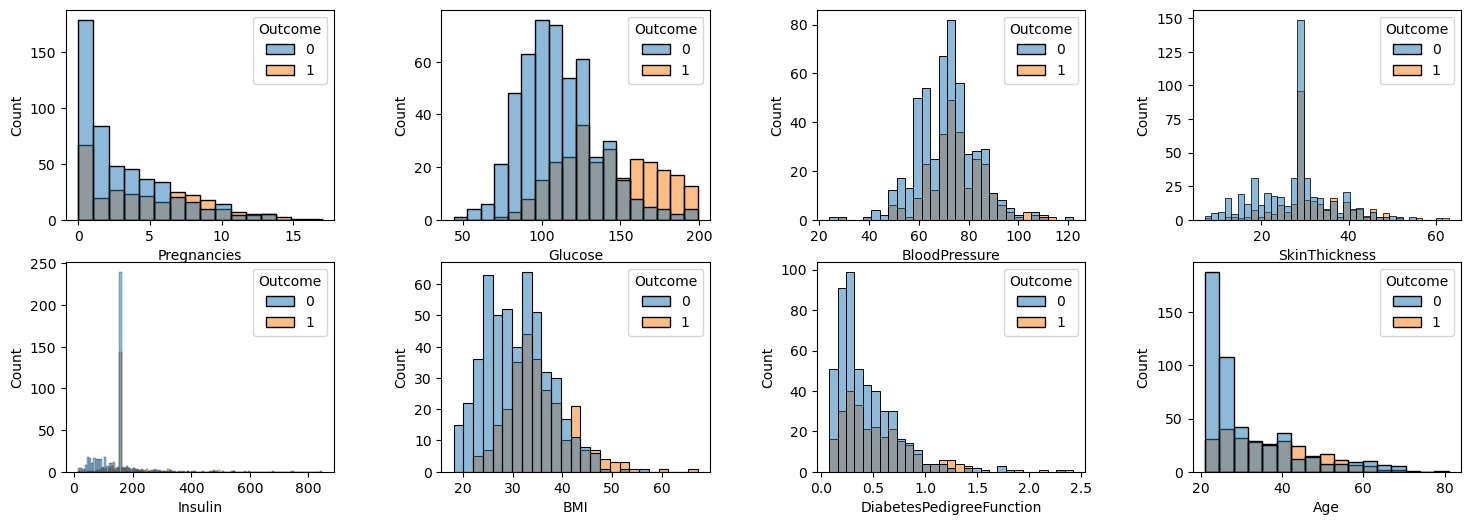

In [30]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
for i in range(8):
    sns.histplot(x = df.columns[i], hue = "Outcome", ax=axes[i//4][i%4], data = df)
plt.subplots_adjust(wspace=0.4)
plt.show()

- 글루코스 수치, BMI, 나이 이 당뇨병을 분류하는데 중요한 피처가 될 수 있을 듯 하다

## 2. Classification with RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [33]:
X = df[df.columns[:-1]]
y = df["Outcome"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)


In [56]:
## 정규화 진행
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [57]:
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

In [62]:
rf = RandomForestClassifier(n_estimators=1000,criterion= "gini")
rf.fit(X_train_n, y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:
test_predict = rf.predict(X_test_n)
train_predict = rf.predict(X_train_n)
print(accuracy_score(y_train, train_predict))
print(accuracy_score(y_test, test_predict))

1.0
0.7447916666666666


In [ ]:
## 하이퍼 파라미터 튜닝

In [65]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[2800, 3000],
    'max_depth' : [6, 8, 10], 
    'min_samples_split' : [8, 16]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=2, verbose=2 )
grid_cv.fit(X_train_n , y_train) # grid.cv.fit(train_x, train_y)

estimator =grid_cv.best_estimator_ 
pred = estimator.predict(X_test_n) # estimator.predict(test)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END max_depth=6, min_samples_split=8, n_estimators=2800; total time=   5.7s
[CV] END max_depth=6, min_samples_split=8, n_estimators=2800; total time=   5.7s
[CV] END max_depth=6, min_samples_split=8, n_estimators=3000; total time=   5.6s
[CV] END max_depth=6, min_samples_split=8, n_estimators=3000; total time=   5.6s
[CV] END max_depth=6, min_samples_split=16, n_estimators=2800; total time=   4.4s
[CV] END max_depth=6, min_samples_split=16, n_estimators=2800; total time=   4.4s
[CV] END max_depth=6, min_samples_split=16, n_estimators=3000; total time=   4.6s
[CV] END max_depth=6, min_samples_split=16, n_estimators=3000; total time=   4.6s
[CV] END max_depth=8, min_samples_split=8, n_estimators=2800; total time=   5.0s
[CV] END max_depth=8, min_samples_split=8, n_estimators=2800; total time=   5.0s
[CV] END max_depth=8, min_samples_split=8, n_estimators=3000; total time=   5.4s
[CV] END max_depth=8, min_samples_split=8, n

In [66]:
rf2 = RandomForestClassifier(n_estimators=2800,max_depth=8, min_samples_split=16)
rf2.fit(X_train_n, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=16, n_estimators=2800)

In [67]:
test_predict = rf2.predict(X_test_n)
train_predict = rf2.predict(X_train_n)
print(accuracy_score(y_train, train_predict))
print(accuracy_score(y_test, test_predict))

0.8871527777777778
0.765625
